In [235]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [255]:
def bilateral_conv_point(image, x, y, filter_sz, sigma_s, sigma_r):
    c = (filter_sz-1)//2
    sub_image = image[x-c : x+c+1, y-c : y+c+1]
    
    # Spatial Gaussian
    kernel_s = lambda x : (1/(2*np.pi*sigma_s*sigma_s)) * np.exp(-(x*x)/(2*sigma_s*sigma_s))
    gaussian_s = [[np.linalg.norm(np.array((i, j)) - np.array((filter_sz//2, filter_sz//2))) for j in range(filter_sz)] for i in range(filter_sz)]
    gaussian_s = np.array([[kernel_s(x) for x in y] for y in gaussian_s])
    
    # Range Gaussian
    kernel_r = lambda x : (1/(2*np.pi*sigma_r*sigma_r)) * np.exp(-(x*x)/(2*sigma_r*sigma_r))
    gaussian_r = [[sub_image[filter_sz//2, filter_sz//2] - sub_image[i, j] for j in range(filter_sz)] for i in range(filter_sz)]
    gaussian_r = np.array([[kernel_r(x) for x in y] for y in gaussian_r])
    
    filter = gaussian_s * gaussian_r
    
    result = np.sum(sub_image * filter)
    result /= np.sum(filter)
    return result

def bilateral_conv_2d(image, filter_sz, sigma_s, sigma_r):
    c = (filter_sz-1)//2

    res_image = np.empty(image.shape)
    image = np.pad(image, (c, c), 'constant', constant_values=(0))

    for i in range(image.shape[0]-c-1):
        for j in range(image.shape[1]-c-1):
            res_image[i, j] = bilateral_conv_point(image, i+c, j+c, filter_sz, sigma_s, sigma_r)
            
    return res_image

In [313]:
def laplacian_filter(image, kernel_type, c):
    if kernel_type == 1:
        kernel = np.array([ [0, -1, 0], [-1, 4, -1], [0, -1, 0] ])
    elif kernel_type == 2:
        kernel = np.array([ [-1, -1, -1], [-1, 8, -1], [-1, -1, -1] ])
    
    res_image = np.empty(image.shape)
    ce = 1
    image = np.pad(image, (ce, ce), 'constant', constant_values=(0))
    
    for i in range(image.shape[0]-ce-1):
        for j in range(image.shape[1]-ce-1):
            sub_image = image[i : i+2*ce+1, j : j+2*ce+1]
            res_image[i, j] = np.sum(sub_image * kernel)
    
    image = image[ce : image.shape[0] - ce , ce : image.shape[1] - ce]

    res_image = (res_image - np.min(res_image)) * 255 / np.max(res_image)
    res_image = image + c*res_image
    res_image = (res_image - np.min(res_image)) * 255 / np.max(res_image)
    
    return res_image

4828.003417562999


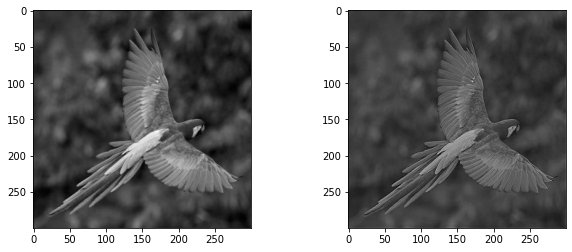

In [314]:
image2 = imageio.imread("images/arara.png").astype(np.float)
image2_f = laplacian_filter(image2, 1, 0.5).astype(np.uint8)

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.imshow(image2, cmap="gray", vmin=0, vmax=255)
plt.subplot(132)
plt.imshow(image2_f, cmap="gray", vmin=0, vmax=255)

error = np.sum(np.square(image2.astype(np.float) - image2_f.astype(np.float)))
error = np.sqrt(error)
print(error)

3429.361310798266


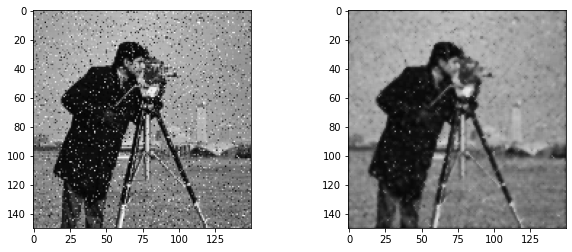

In [254]:
image1 = imageio.imread("images/camera.png").astype(np.float)

image1_f = bilateral_conv_2d(image1, 3, 150, 100).astype(np.uint8)

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.imshow(image1, cmap="gray", vmin=0, vmax=255)
plt.subplot(132)
plt.imshow(image1_f, cmap="gray", vmin=0, vmax=255)